# Star Wars Survey

## Overview

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

* **RespondentID** - An anonymized ID for the respondent (person taking the survey)
* **Gender** - The respondent's gender
* **Age** - The respondent's age
* **Household Income** - The respondent's income
* **Education** - The respondent's education level
* **Location** (Census Region) - The respondent's location
* **Have you seen any of the 6 films in the Star Wars franchise?** - Has a Yes or No response
* **Do you consider yourself to be a fan of the Star Wars film franchise?** - Has a Yes or No response

In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Remove null values in `RespondentID` key

In [5]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [6]:
star_wars[star_wars['RespondentID'].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)


## Cleaning and Mapping Yes/No Columns

In [7]:
mapping = {'Yes':True, 'No':False}
for i in range(1,3):
    star_wars.iloc[:,i]=star_wars.iloc[:,i].map(mapping)


In [8]:
star_wars.iloc[:,1:3].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


## Cleaning and Mapping Checkbox Columns

In [9]:
for i in range(3,9):

    y = star_wars.iloc[:,i].copy()
    y[y.isnull()] = False
    y[y!=False] = True
    star_wars.iloc[:,i] = y


In [10]:
star_wars.iloc[:,3:9].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [11]:
for i in range(3,9):
    star_wars.rename(columns = {star_wars.columns[i]:
                               'seen_'+str(i-2)}, inplace = True)

    

In [12]:
star_wars.iloc[:,3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


## Cleaning the Ranking Columns

In [13]:
star_wars.iloc[:,9:15] = star_wars[star_wars.columns[9:15]].astype('float')

In [14]:
star_wars[star_wars.columns[9:15]].dtypes

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    float64
Unnamed: 10                                                                                                                                      float64
Unnamed: 11                                                                                                                                      float64
Unnamed: 12                                                                                                                                      float64
Unnamed: 13                                                                                                                                      float64
Unnamed: 14                                                                                                                                      float64
dtype: object

In [15]:
for i in range(9,15):
    star_wars.rename(columns = {star_wars.columns[i]:'ranking_'
                               +str(i-8)}, inplace=True)

In [16]:
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Finding the Highest-Ranked Movie

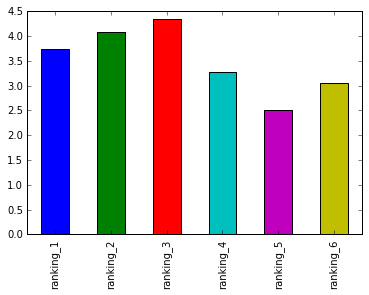

In [17]:
%matplotlib inline
star_wars[star_wars.columns[9:15]].mean().plot.bar()

## Finding the Most Viewed Movie

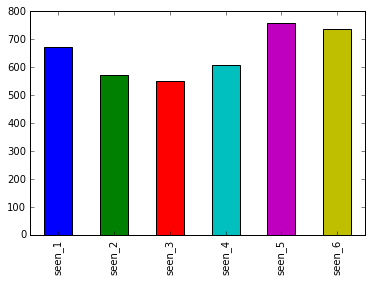

In [18]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

## Exploring the Data by Binary Segments

* Split the data into two groups based on one of the binary columns:
 
`"Do you consider yourself to be a fan of the Star Wars film franchise?"`
 
`"Do you consider yourself to be a fan of the Star Trek franchise?"`
 
`"Gender"`

In [19]:
sw = "Do you consider yourself to be a fan of the Star Wars film franchise?" 
st = "Do you consider yourself to be a fan of the Star Trek franchise?"
g = "Gender"
sw_fans = star_wars[star_wars[sw] == True]
not_sw_fans = star_wars[star_wars[sw]==False]
st_fans = star_wars[star_wars[st]== 'Yes']
not_st_fans = star_wars[star_wars[st]=='No']
males = star_wars[star_wars['Gender']=='Male']
females = star_wars[star_wars['Gender'] == 'Female']
    

* Find the most viewed movie and the highest-ranked movie separately for each group

#### Finding the Highest-Ranked Movie for Star War fans, Star Trek fans; not Fans as well as for Males and Females

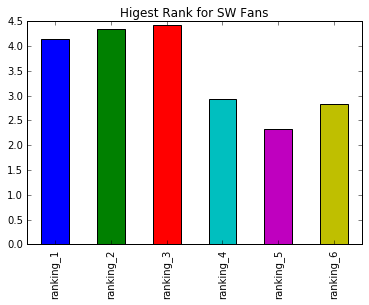

In [20]:
sw_fans[sw_fans.columns[9:15]].mean().plot.bar(title = 'Higest Rank for SW Fans')

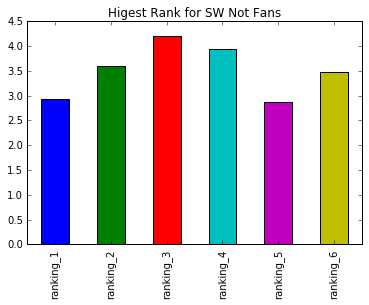

In [21]:
not_sw_fans[not_sw_fans.columns[9:15]].mean().plot.bar(title = 'Higest Rank for SW Not Fans')

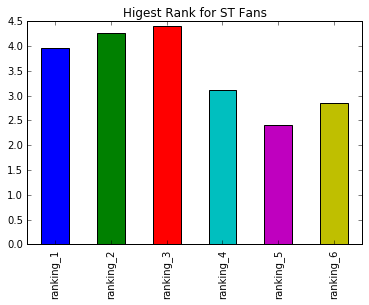

In [22]:
st_fans[st_fans.columns[9:15]].mean().plot.bar(title = 'Higest Rank for ST Fans')

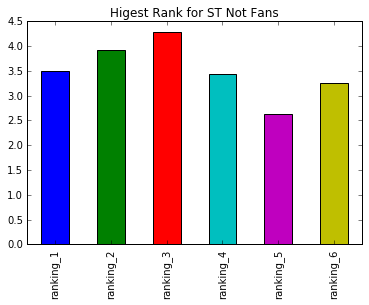

In [23]:
not_st_fans[not_st_fans.columns[9:15]].mean().plot.bar(title = 'Higest Rank for ST Not Fans')

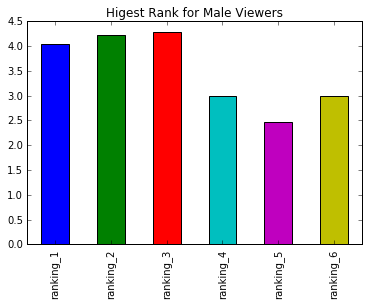

In [24]:
males[males.columns[9:15]].mean().plot.bar(title = 'Higest Rank for Male Viewers')

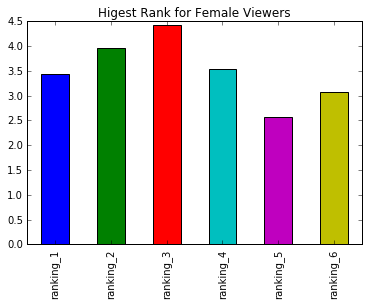

In [25]:
females[females.columns[9:15]].mean().plot.bar(title = 'Higest Rank for Female Viewers')

>The third movie is the best performer for all sub groups of viewers.

#### Most Viewed Movie for the Subgroups

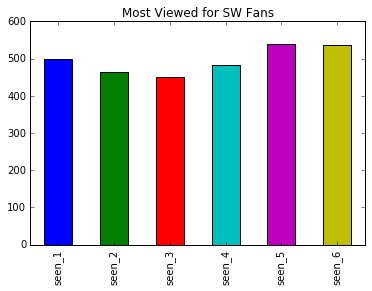

In [26]:
sw_fans[sw_fans.columns[3:9]].sum().plot.bar(title = 'Most Viewed for SW Fans')

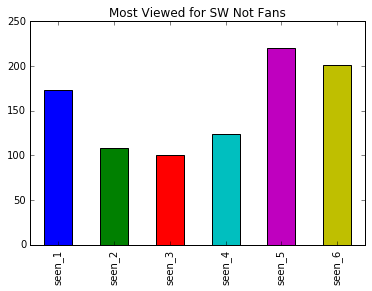

In [27]:
not_sw_fans[not_sw_fans.columns[3:9]].sum().plot.bar(title = 'Most Viewed for SW Not Fans')

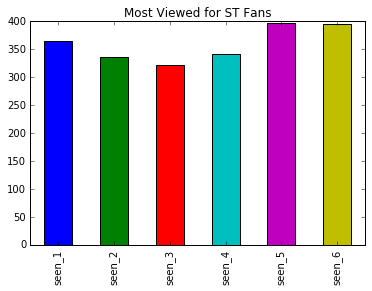

In [28]:
st_fans[st_fans.columns[3:9]].sum().plot.bar(title = 'Most Viewed for ST Fans')

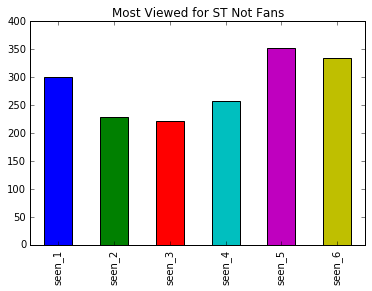

In [29]:
not_st_fans[not_st_fans.columns[3:9]].sum().plot.bar(title = 'Most Viewed for ST Not Fans')

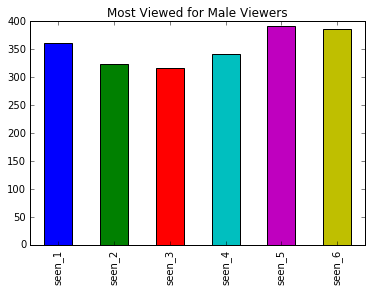

In [30]:
males[males.columns[3:9]].sum().plot.bar(title = 'Most Viewed for Male Viewers')

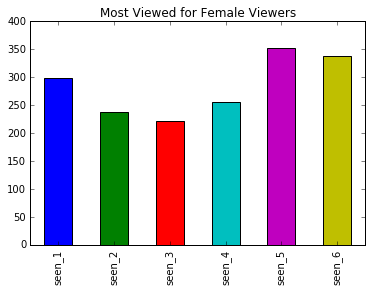

In [31]:
females[females.columns[3:9]].sum().plot.bar(title = 'Most Viewed for Female Viewers')

>The fifth episode seems to be the most viewed for all subgroups, closely followed by the sixth.

## Next Steps

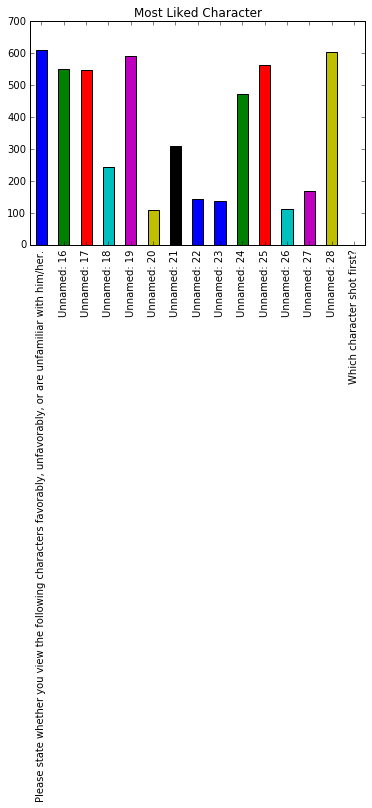

In [32]:
star_wars[star_wars[star_wars.columns[15:30]]=='Very favorably'][star_wars.columns[15:30]].count().plot.bar(title = 'Most Liked Character')

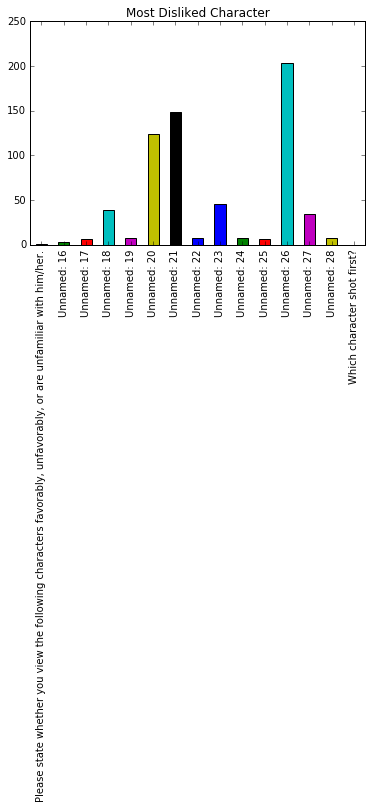

In [33]:
star_wars[star_wars[star_wars.columns[15:30]]=='Very unfavorably'][star_wars.columns[15:30]].count().plot.bar(title = 'Most Disliked Character')

In [34]:
star_wars[star_wars.columns[15]].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

>The most controversial character seems to be No21, concentrating the most likes and dislikes.

#### Segmenting the data based on columns like "Education", "Location (Census Region)", and "Which character shot first?".

In [35]:
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

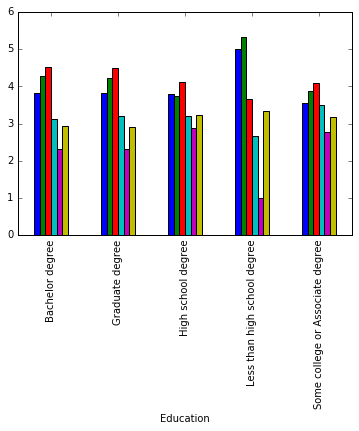

In [43]:
gr = star_wars.groupby(by = 'Education')
gr[star_wars.columns[9:15]].mean().plot.bar(legend = None)

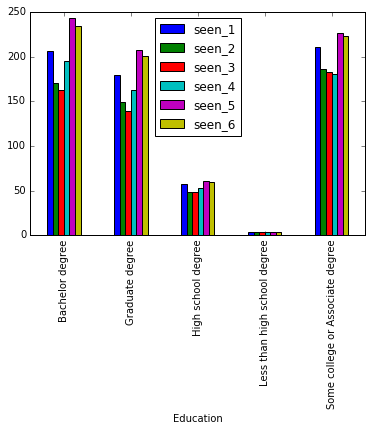

In [38]:
gr[star_wars.columns[3:9]].sum().plot.bar()

In [41]:
loc = 'Location (Census Region)'
star_wars[loc].value_counts(dropna=False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

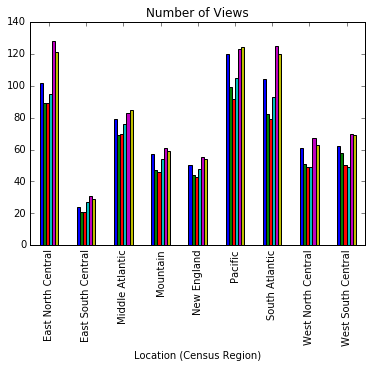

In [50]:
gr_loc = star_wars.groupby(by=loc)
gr_loc[star_wars.columns[3:9]].sum().plot.bar(legend = None, title = 'Number of Views')

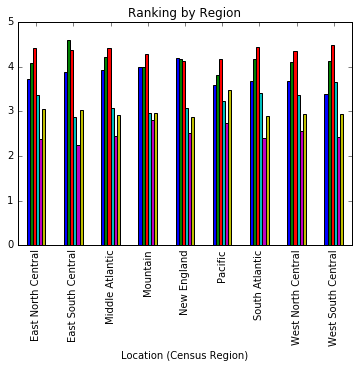

In [54]:
gr_loc[star_wars.columns[9:15]].mean().plot.bar(legend = None,title = 'Ranking by Region')

In [55]:
shot = 'Which character shot first?'
star_wars[shot].value_counts(dropna = False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

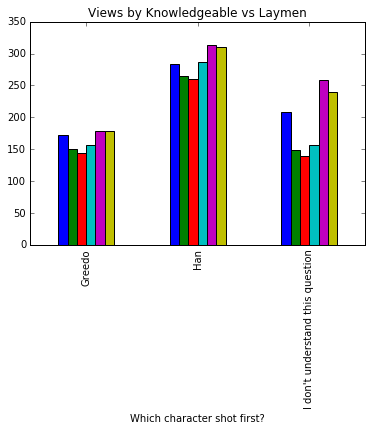

In [60]:
gr_shot = star_wars.groupby(by = shot)
gr_shot[star_wars.columns[3:9]].sum().plot.bar(legend = None,title = 'Views by Knowledgeable vs Laymen')